# Data Science for Business - Exercise 1
### Name Last_Name

References:

1- Churn Data by Synful: https://www.kaggle.com/datasets/synful/churn-data Uploaded under CC0 licence.

2- Churn Analysis by Synful: https://www.kaggle.com/code/synful/churn-analysis Uploaded under Apache 2.0 licence.

3- Interpretation of XGBoost 85% accuracy by Anggi Dwifiani: https://www.kaggle.com/code/anggidwifiani/interpretation-of-xgboost-85-accuracy Uploaded under Apache 2.0 licence.

4- Scikit Learn Documentation https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html



5- Discussed the exercise with Name Last_Name.


## 1- Importing and exploration of data

We firstly need to mount our Google Drive in the current IPython notebook. We use the drive function in the built-in library of Google Colab to do this. When you run the following code, it asks for your permission to have access to your Google Drive.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


The next step is to load our dataset in the IPython notebook. We use the famous Pandas library for this reason. Pandas is a famous library for analysing the structured data (tabular data). As we need pandas in the next parts, we give a simpler calling name to it for simplicity (pd).

We use the read_csv function of pandas library to load our dataset as variable.

In [2]:
import pandas as pd
train_data = pd.read_csv('/content/drive/My Drive/Class_1-Train.csv')  # Change according to the place of the dataset on your Google Drive


The first step is to show the first lines of the our loaded dataset.

In [3]:
train_data.head(n=10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


When you want to analyse a dataset and fit a prediction model on it, you should make sure that your data is clean first. An important aspect of data cleaning is to check whether your dataset has missing values or not.

In [18]:
train_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

We can get more information about our dataset with info function. It also shows the type of the different indicators (columns).

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        8000 non-null   int64  
 1   CustomerId       8000 non-null   int64  
 2   Surname          8000 non-null   object 
 3   CreditScore      8000 non-null   int64  
 4   Geography        8000 non-null   object 
 5   Gender           8000 non-null   object 
 6   Age              8000 non-null   int64  
 7   Tenure           8000 non-null   int64  
 8   Balance          8000 non-null   float64
 9   NumOfProducts    8000 non-null   int64  
 10  HasCrCard        8000 non-null   int64  
 11  IsActiveMember   8000 non-null   int64  
 12  EstimatedSalary  8000 non-null   float64
 13  Exited           8000 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 875.1+ KB


## 2 -Analysing and Visualisation of Data

Histograms provide a lot of information about the distribution of the data for the different indicators.

array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

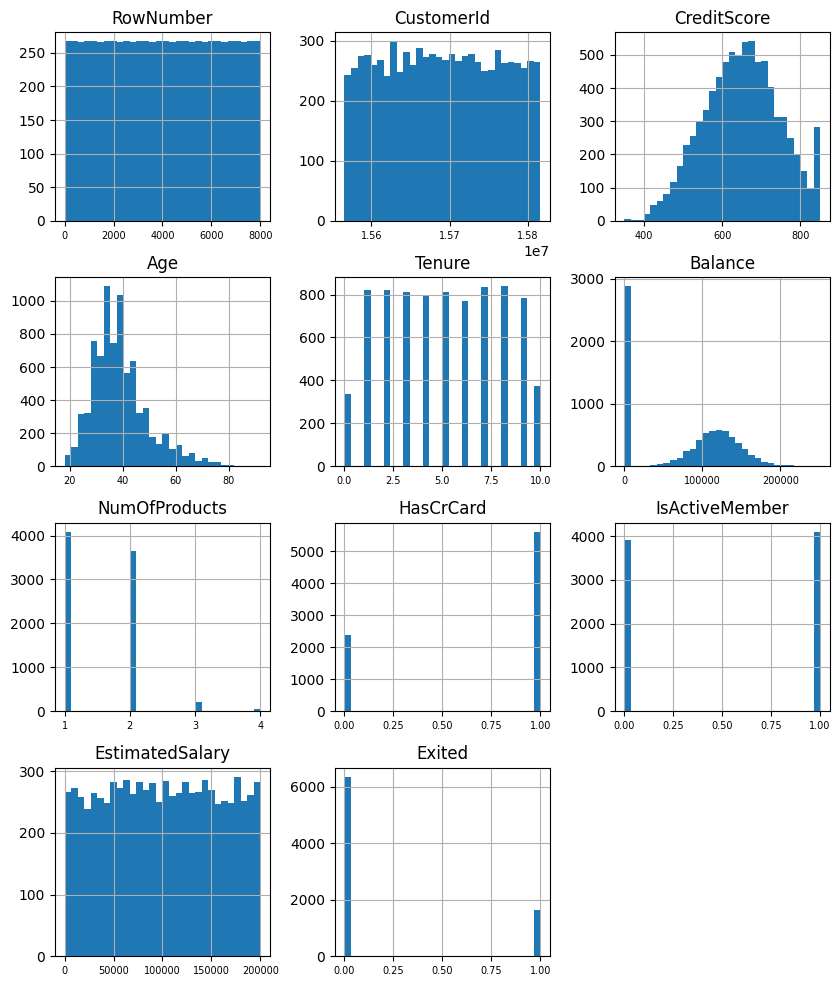

In [19]:
train_data.hist(bins=30,figsize=[10,12], xlabelsize =7)

We can get useful quantitative information from the dataset using describe function.

In [6]:
train_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,8000.00000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,1.569069e+07,650.179625,38.937875,5.012750,76800.037193,1.528000,0.701625,0.512625,100198.588701,0.205875
std,2309.54541,7.157970e+04,96.844314,10.511224,2.884376,62391.192584,0.583102,0.457574,0.499872,57524.002768,0.404365
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2000.75000,1.562869e+07,583.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51271.410000,0.000000
50%,4000.50000,1.569035e+07,651.000000,37.000000,5.000000,97658.060000,1.000000,1.000000,1.000000,100272.165000,0.000000
75%,6000.25000,1.575234e+07,717.000000,44.000000,7.000000,127827.332500,2.000000,1.000000,1.000000,149372.387500,0.000000
max,8000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


We can ask for  more specific information and plot them using different plots.

In [7]:
train_data.Age.mean()

38.937875

In [8]:
train_data.Exited.value_counts()

0    6353
1    1647
Name: Exited, dtype: int64

<Axes: >

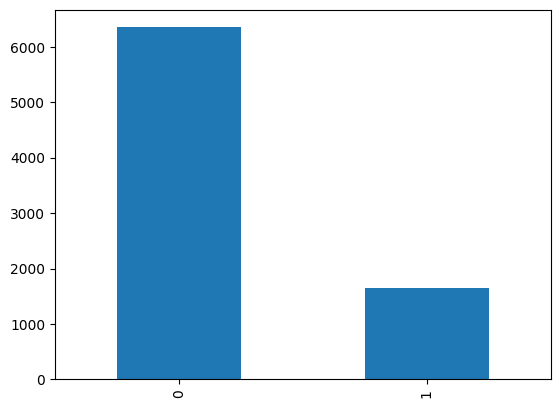

In [15]:
train_data.Exited.value_counts().plot(kind='bar')

<Axes: ylabel='Gender'>

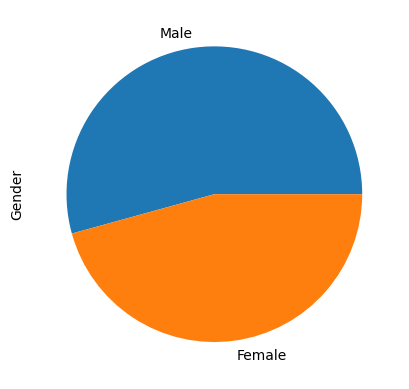

In [16]:
train_data.Gender.value_counts().plot(kind='pie')

In [10]:
train_data[['Age','EstimatedSalary','Balance']].mean()

Age                    38.937875
EstimatedSalary    100198.588701
Balance             76800.037193
dtype: float64

To get more insights about the people who churned, we can conditionalise our dataset on 'Exited' indicator.

In [11]:
exited_data = train_data.groupby('Exited')
exited_data[['Age','EstimatedSalary','Balance']].mean()

,Age,EstimatedSalary,Balance
Exited,,,
0,37.375571,99739.779402,73117.077922
1,44.964177,101968.361305,91006.376138


Boxplots are very helpful to get insights about the effect of the different indicators on Churn as they give insights about the distribution of the users (rows in the dataset).

0         Axes(0.1,0.15;0.363636x0.75)
1    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

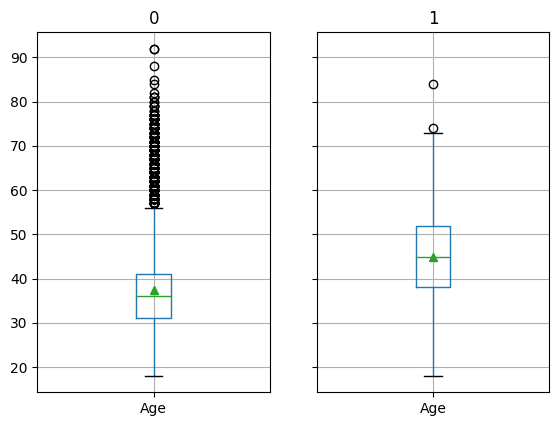

In [20]:
exited_data[['Age']].boxplot(showmeans = True)

## 3 - Fitting a model on training set and testing on testing set

We use decision tree classifier and random forest classifier models. You can read about them at https://en.wikipedia.org/wiki/Decision_tree_learning and https://en.wikipedia.org/wiki/Random_forest .

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


We define input indicators as 'X' and output (churn) as 'y'. We have to drop the indicators that does not have a meaningful effect on churn such as'RowNumber'. Additionally, we should transform the categorical indicators such as Gender and Geography to numerical indicators, if it is possible according to the dataset.

In [ ]:
X_train = train_data.drop(columns = ['RowNumber', 'CustomerId', 'Surname','Exited'])
X_train['Gender'] = X_train['Gender'].map({'Female' : 1, 'Male' : 2})
X_train['Geography'] = X_train['Geography'].map({'France' : 1, 'Spain' : 2, 'Germany' : 3})

y_train = train_data['Exited']

In data-driven models, our availbale dataset should be divided in to two disjoint subsets: Training Set and Test Set. We must fit the model and do all the analyses on the training set and when our trained model is ready, test it on the unseen test set. To keep the tests fair, the model should not have access to the test set until the final evaluation. In this exercise, we have already provided you the training set and the test set as two different csv files; however, if you just have one dataset file, as a rule of tumb, it should be divided to 80% training set and 20% test set.


We make a decision tree clasifier model and fit it (train it) on the training set.

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X=X_train, y=y_train);

We load the test set and do the similar pre-processing on it

In [ ]:
test_data = pd.read_csv('/content/drive/My Drive/Class_1-Test.csv', )

In [ ]:
X_test = test_data.drop(columns = ['RowNumber', 'CustomerId', 'Surname','Exited'])
X_test['Gender'] = X_test['Gender'].map({'Female' : 1, 'Male' : 2})
X_test['Geography'] = X_test['Geography'].map({'France' : 1, 'Spain' : 2, 'Germany' : 3})

y_test = test_data['Exited']


We evaluated the accuracy of our trained model on the unseen test set.

In [ ]:
model_dt.score(X=X_test, y=y_test)

0.781

The decision tree classifier model provides 77.85% accuracy on the unseen test data.





Let's do the same steps with random forest classifier model.

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X=X_train, y=y_train);

In [ ]:
model_rf.score(X=X_test, y=y_test)

0.864

The random forest model provides 86.55% accuracy on the unseen test data.


We can get a more detailed explanation of the accuracy of our model using classification_report function. In addition to the accuracy of prediction, it provides the following:

- Precision: correct predictions divided by total predictions for each label (for 0 or 1)
- Recall: correct predictions divided by total actual values (for 0 or 1)
- F1 Score: A weighted mean of precision and recall. When it is closer to 1, the model works better. It is calculated by
F1_Score = 2 * (Precision * Recall) / (Precision + Recall)
- Support: The number of actual samples in the test set for each class (for 0 or 1).
- Accuracy: The accuracy of model which is similar to the output of score function.
- Macro average: Arithmetic mean of precision values for different classes
- Weighted average: Mean of precision values for different classes weighted by the number of support for each class



In [ ]:
from sklearn.metrics import classification_report

y_pred = model_rf.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1766
           1       0.45      0.75      0.56       234

    accuracy                           0.86      2000
   macro avg       0.71      0.82      0.74      2000
weighted avg       0.90      0.86      0.88      2000



There are many other claissifer models available (like XGBoost) that you can search and learn about them.

## 4 - Finding the most effective indicators

SHapley Additive exPlanations or SHAP values uses cooporative game theory to show to provide a metric for importance of each indicator in the fitted model. More information about them at  https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137 , https://www.statcan.gc.ca/en/data-science/network/explainable-learning and https://github.com/shap/shap .

Since SHAP is not a built-in library of Colab, we have to install it first.

In [ ]:
!pip install shap

We define a shap explainer object on our model using the training set and use this explainer on the testing set. Defining a shap explainer takes some time. Please be patient!

In [ ]:
import shap
explainer = shap.Explainer(model_rf.predict, X_train)
rf_shap_values = explainer(X_test)

Exact explainer: 2001it [22:04,  1.50it/s]


The bar plot of absolute SHAP values sorts the indicators based on their effect on the output. Here age is the most important indicator in users' churn.

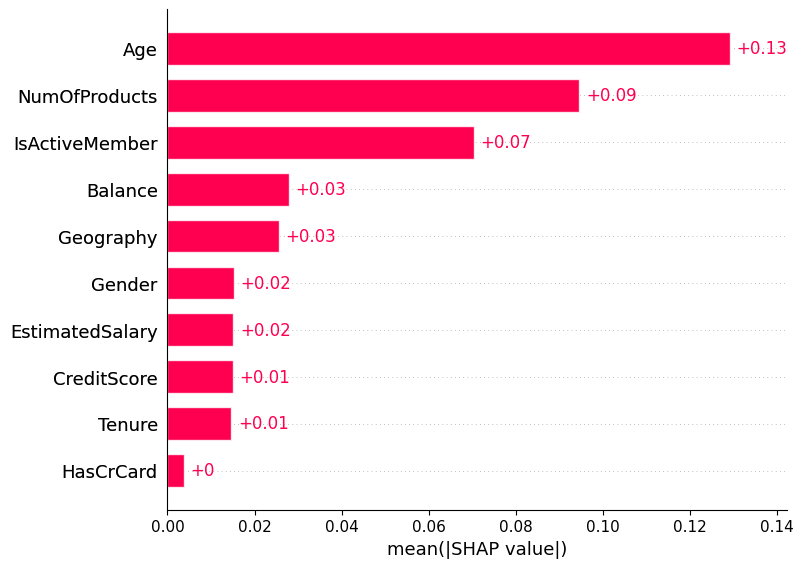

In [ ]:
shap.plots.bar(rf_shap_values)

Beeswarm plot of SHAP values also sorts the effect of indicators. Additionally, it shows if each of them has a negative effect or a positive effect. For example, according to the plot higher age has a positive effect on churn, but being a more active member has a negative effect on the desire to churn. It also gives us some insights about the distribution of samples as each of the points represents a sample ( a row in the dataframe).

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


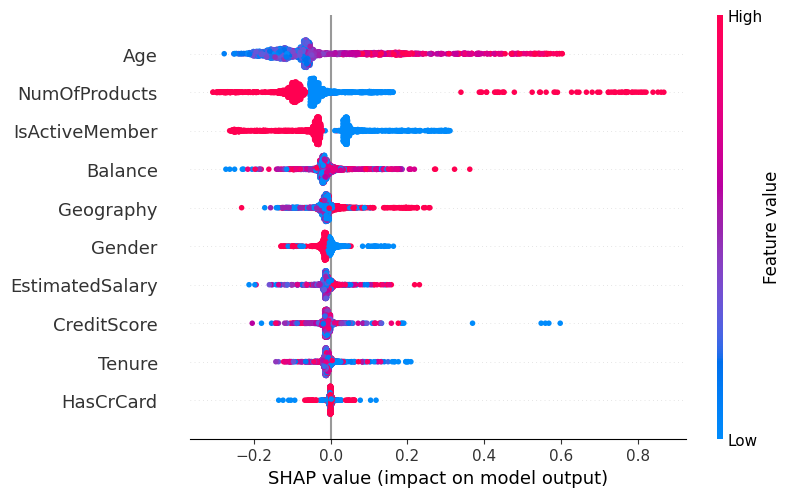

In [ ]:
shap.plots.beeswarm(rf_shap_values)